In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")

In [ ]:
data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [ ]:
data.shape

(10000, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

preparing the data

In [ ]:
data.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,982
vehicle_ownership,0
vehicle_year,0


In [ ]:
data.groupby(by="income")["credit_score"].mean()

,credit_score
income,
middle class,0.523659
poverty,0.348331
upper class,0.613827
working class,0.431929


In [ ]:
def impute_credit_score(income_classes):
  for income_class in income_classes:

    mask = data['income'] == income_class

    mean = data[data['income'] == income_class]['credit_score'].mean()

    data.loc[mask, 'credit_score'] = data.loc[mask, 'credit_score'].fillna(mean)


In [ ]:
income_groups = ['poverty', 'upper class', 'middle class', 'working class']
impute_credit_score(income_groups)

data.isnull().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


In [ ]:
data.groupby(by='driving_experience')["annual_mileage"].mean()

,annual_mileage
driving_experience,
0-9y,12249.131670
10-19y,11791.275168
20-29y,11144.181256
30y+,10694.968553


In [ ]:
mean_mil = data['annual_mileage'].mean()

data['annual_mileage'].fillna(mean_mil, inplace=True)

data.isnull().sum()

<ipython-input-56-1cdc5c499a45>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['annual_mileage'].fillna(mean_mil, inplace=True)


,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


dropping columns

In [ ]:
data.drop(columns =['id', 'postal_code'], axis=1, inplace= True)

Analyzing the data

In [ ]:
#univariate analysis

data['gender'].value_counts()

,count
gender,
female,5010
male,4990


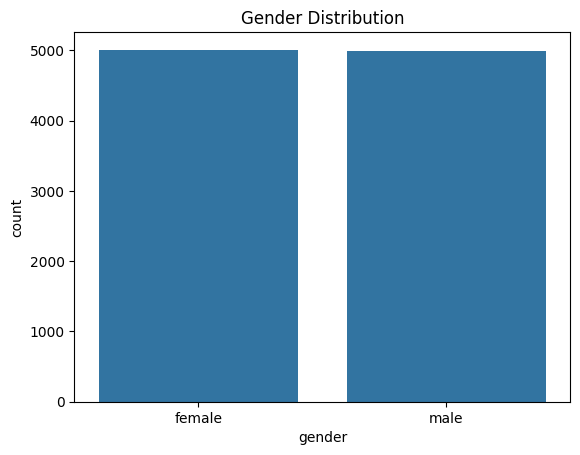

In [ ]:
sns.countplot(data=data, x='gender')
plt.title("Gender Distribution")
plt.show()

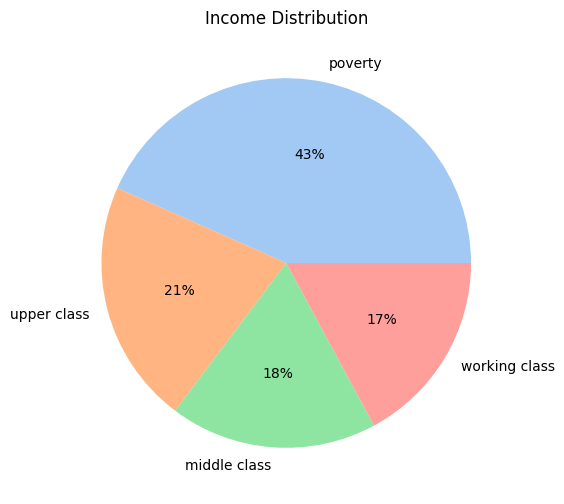

In [ ]:
plt.figure(figsize=(6,6))
df =data['income'].value_counts(normalize=True)

labels = ['poverty', 'upper class', 'middle class', 'working class']

colors = sns.color_palette('pastel')

plt.pie(df, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Income Distribution")
plt.show()

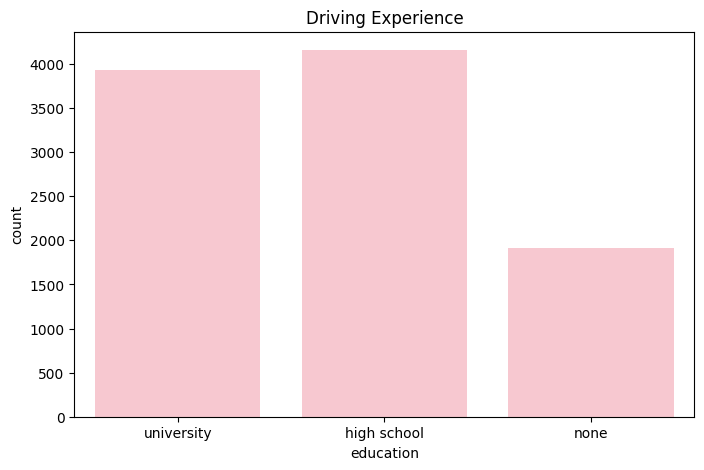

In [ ]:
plt.figure(figsize =(8,5))

sns.countplot(data=data, x="education", order=["university", "high school", "none"], color="pink")
plt.title("Driving Experience")
plt.show()

In [ ]:
data['credit_score'].describe()

,credit_score
count,10000.000000
mean,0.515247
std,0.134628
min,0.053358
25%,0.421301
50%,0.523659
75%,0.613827
max,0.960819


[Text(0.5, 1.0, 'Credit Score Distribution'),
 Text(0, 0.5, 'Number of clients')]

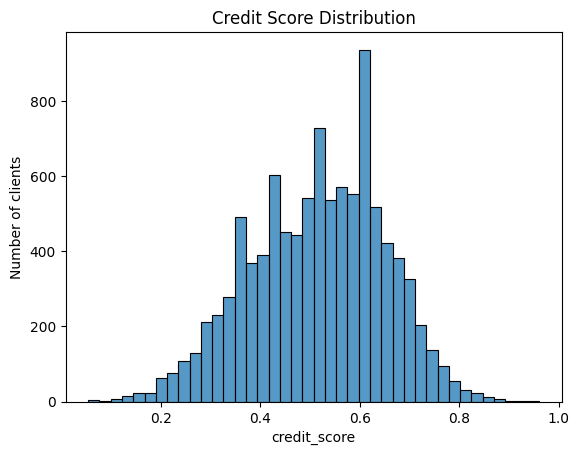

In [ ]:
sns.histplot(data=data, x='credit_score', bins=40).set(title="Credit Score Distribution", ylabel="Number of clients")

[Text(0.5, 1.0, 'Distribution of annual Mileage'),
 Text(0, 0.5, 'Number of clients')]

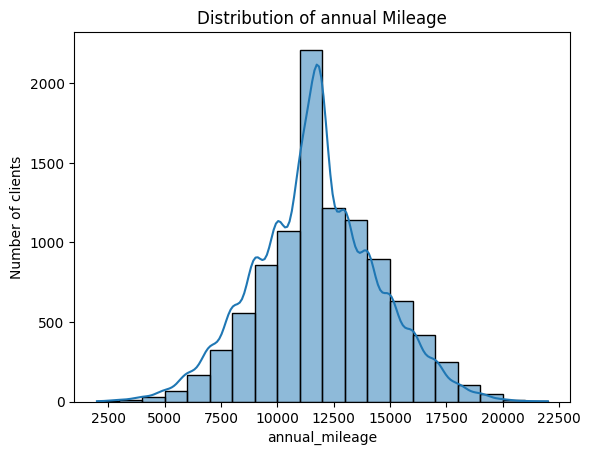

In [ ]:
sns.histplot(data=data, x='annual_mileage', bins=20, kde=True).set(title="Distribution of annual Mileage", ylabel="Number of clients")

Bivariate analysis

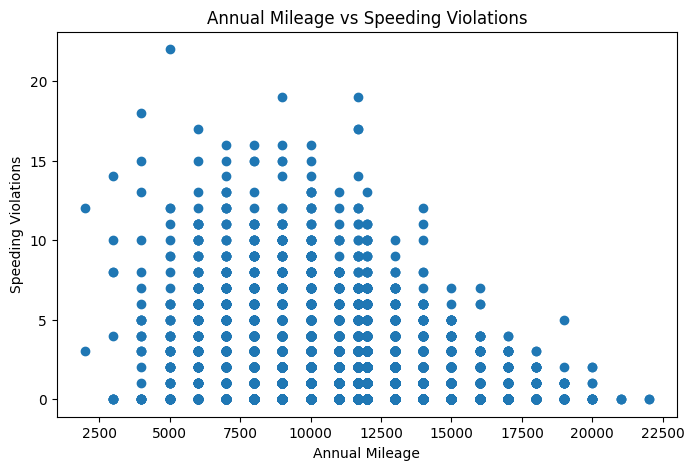

In [ ]:
plt.figure(figsize=(8,5))

plt.scatter(data=data, x='annual_mileage', y='speeding_violations')
plt.title("Annual Mileage vs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Annual Mileage")
plt.show()

In [ ]:
corr_matrix  = data[['speeding_violations', 'DUIs', 'past_accidents']].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


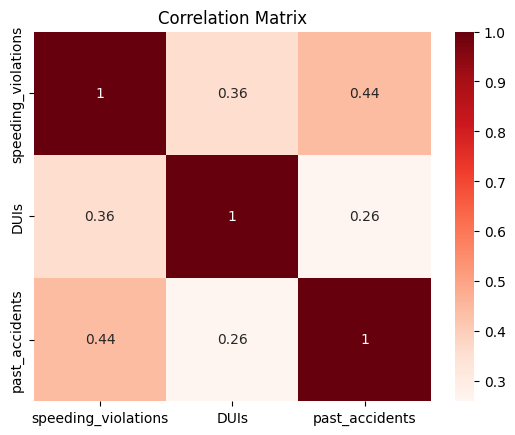

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.groupby('outcome')['annual_mileage'].mean()

,annual_mileage
outcome,
False,11375.549735
True,12401.574221


<ipython-input-78-562b38bf5803>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='outcome', y='annual_mileage',palette=['pink', 'yellow'])


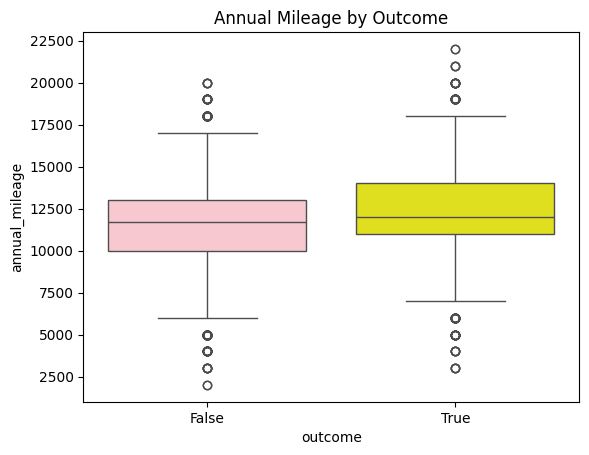

In [ ]:
sns.boxplot(data=data, x='outcome', y='annual_mileage',palette=['pink', 'yellow'])
plt.title("Annual Mileage by Outcome")
plt.show()

<Axes: xlabel='credit_score', ylabel='Density'>

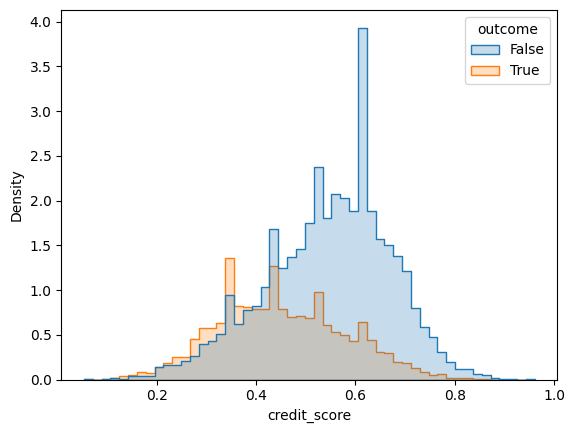

In [ ]:
sns.histplot(data, x='credit_score' ,hue='outcome', element='step', stat= "density")

In [ ]:
data['claim_rate'] = np.where(data['outcome'] == True, 1, 0)
data['claim_rate'].value_counts()

,count
claim_rate,
0,6867
1,3133


<Axes: xlabel='age'>

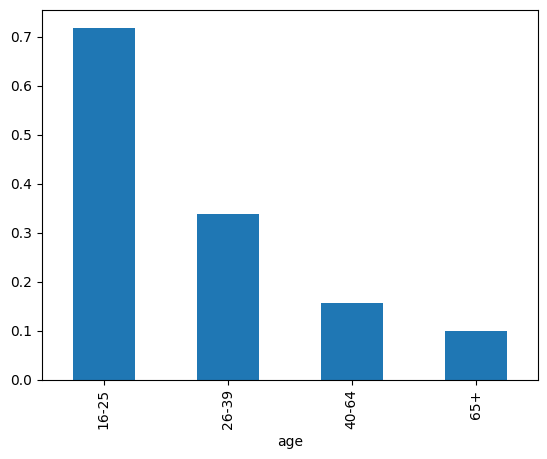

In [ ]:
data.groupby('age')['claim_rate'].mean().plot(kind='bar')


<Axes: xlabel='vehicle_year'>

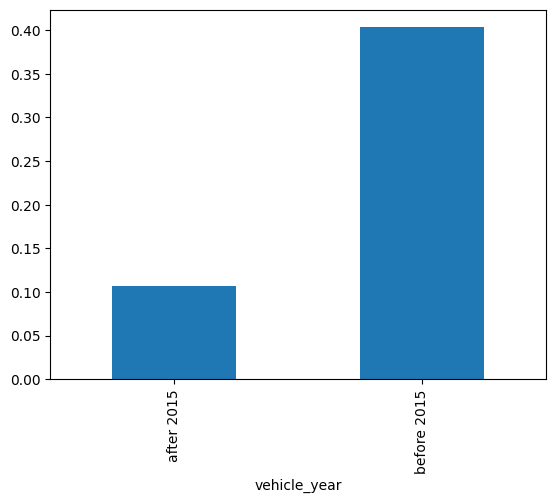

In [ ]:
data.groupby('vehicle_year')['claim_rate'].mean().plot(kind='bar')

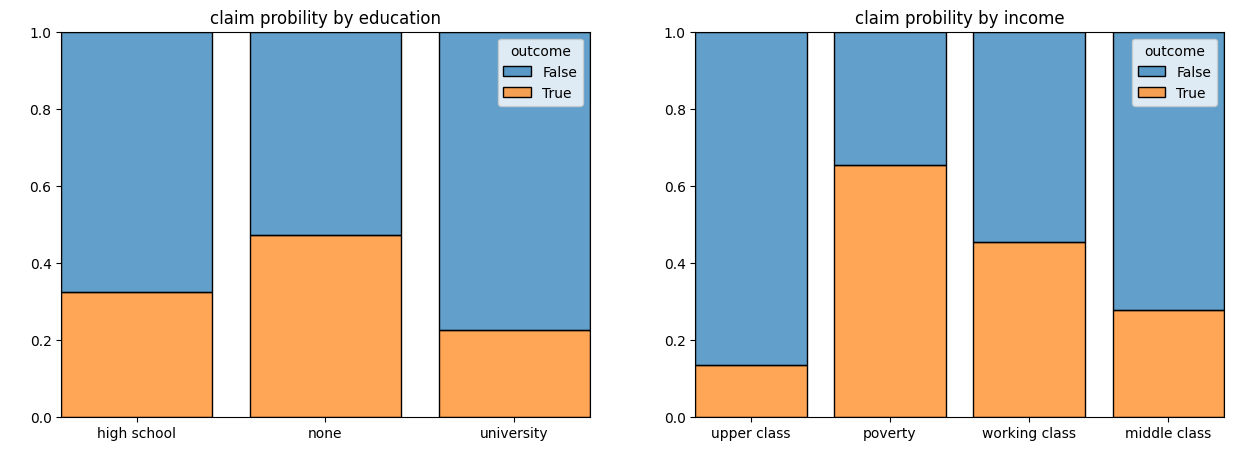

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5))


for i, col in enumerate(['education', 'income']):
  sns.histplot(data, ax=axes[i], x=col, hue='outcome', stat="probability", multiple="fill", shrink=.8, alpha=0.7)
  axes[i].set(title="claim probility by "+ col, ylabel=" ", xlabel =" ")

#Multivariate

In [ ]:
edu_income = pd.pivot_table(data, values='claim_rate', index='education', columns='income', aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


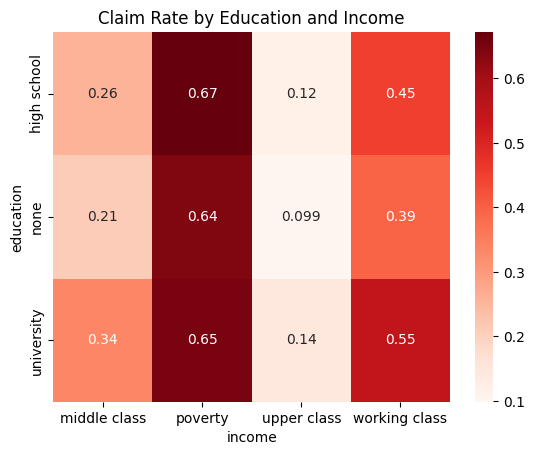

In [ ]:
sns.heatmap(edu_income, annot=True, cmap='Reds')
plt.title("Claim Rate by Education and Income")
plt.show()

In [ ]:
drive_married = pd.pivot_table(data, values='claim_rate', index='driving_experience', columns='married')
drive_married

married,False,True
driving_experience,,
0-9y,0.697981,0.500799
10-19y,0.307018,0.164884
20-29y,0.068742,0.041543
30y+,0.046332,0.010088


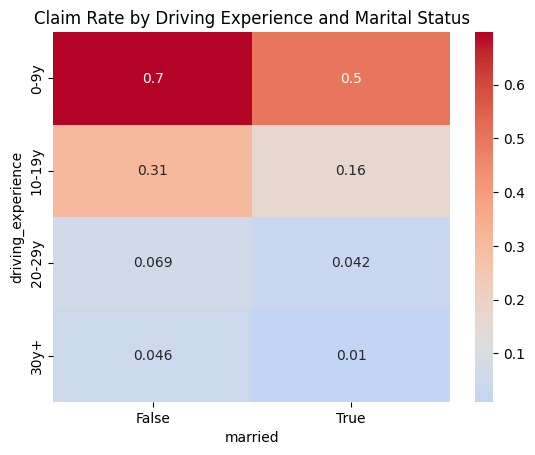

In [ ]:
sns.heatmap(drive_married, annot=True, cmap='coolwarm', center=0.117)
plt.title("Claim Rate by Driving Experience and Marital Status")
plt.show()

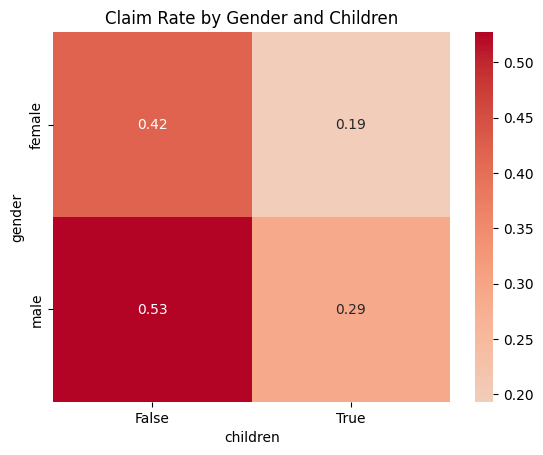

In [ ]:
gender_child = pd.pivot_table(data, values='claim_rate', index='gender', columns ='children')

sns.heatmap(gender_child, annot=True, cmap='coolwarm', center=0.117)
plt.title("Claim Rate by Gender and Children")
plt.show()